In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

# Dataset Exploration

## 1. Load the data for analysis

In [5]:
df = pd.read_csv("insurance.csv")

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Show the structure of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

## 3. Dependent ans Independent features
### Dependent Feature: `charges`
### Independent Features: `age`, `sex`, `bmi`, `children`, `smoker`, `region`

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


## 4. Independant Feature Analysis

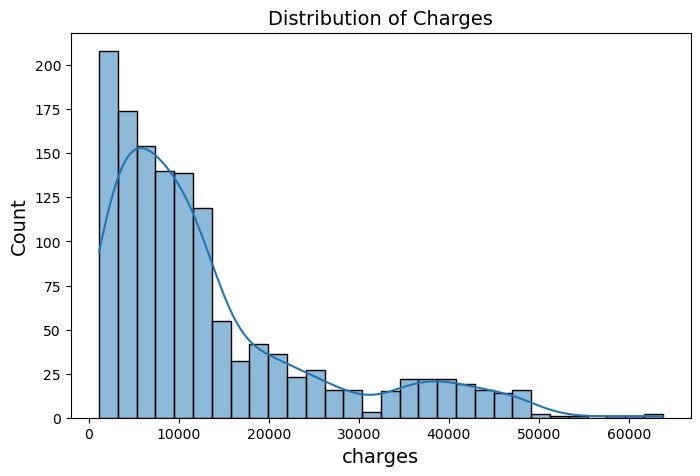

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

### Reason for the analysis
* This is a regression problem. Linear Regression assumes that the residuals (errors) are normally distributed.
* While the target variable itself doesn't strictly have to be normal, a highly skewed target variable here might result in a model with poor predictive power for high-cost outliers.
* From this analysis it is apparent that we might need to apply a transformation (like `log` or `sqrt`) to normalize the data.

## 5. Two methods to Find if the Dependent Variable is Normally Distributed

### Method 1: Histogram with KDE plot
This is shown above
### Method 2: Boxplot

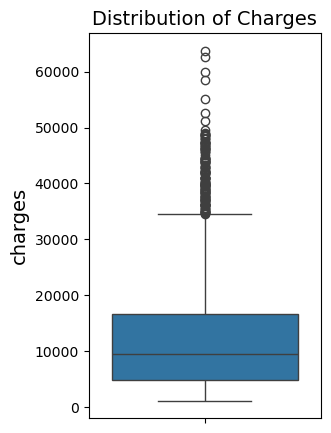

In [12]:
plt.figure(figsize=(3,5))
sns.boxplot(df['charges'])
plt.title('Distribution of Charges')
plt.show()

### Explanation
* Based on the visualizations and statistics, the dependent feature `charges` exhibits a strongly right-skewed (positively skewed) distribution.
* Visually, the histogram shows a long tail extending to the right, while the boxplot reveals a significant number of outliers above the upper whisker.
* Statistically, this skew is confirmed because the mean (13,270) is considerably higher than the median (9,382).
* This indicates that the data is not normally distributed. While the majority of beneficiaries have relatively low medical costs (clustered below 15,000), a smaller segment of the population incurs extremely high expenses (up to ~64,000), pulling the average upward.

## 6. Categorical Independent Features & Distribution

Categorical Features: `sex`, `smoker`, `region` (originally was `object` Dtype, currently `category` Dtype).

In [13]:
for col in df.select_dtypes(include=['category']).columns:
    print(f"Distribution of {col}:")
    print(df[col].value_counts())
    print("\n")

Distribution of sex:
sex
male      676
female    662
Name: count, dtype: int64


Distribution of smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64


Distribution of region:
region
southeast    364
northwest    325
southwest    325
northeast    324
Name: count, dtype: int64




- Distribution for the feature `sex` highly balanced. Almost 50/50 split between males and females.
- `smoker` feature is imbalanced. There are significantly more non-smokers (80%) than smokers (20%).
- `region` is also balanced. The dataset provides a good representation of patients from all parts of the United States.

# Exploring Relationships Among Features

## 7. Correlation Matrix

<Axes: >

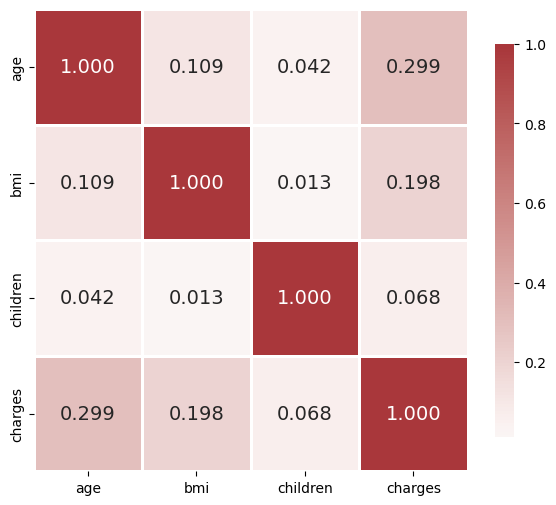

In [14]:
corr = df.corr(numeric_only=True) 
plt.figure(figsize=(7,6))
sns.heatmap(
    corr,
    annot=True,
    fmt='.3f',
    cmap='vlag',
    center=0,
    linewidths=1,         # Add lines between cells
    cbar_kws={"shrink": .85} # Adjust the color bar size
)

## 8. Relationships between Numerical Features

- `age`, `bmi`, and `children` vs `charges` shows positive correlation. There is a modereate positive linear relationship between age and charges. As a person gets older, their medical costs generally increase. This aligns with the intuition that health risks increase with age. Although `bmi` vs `charges` does not show a high correlation, their distribution across the different population categories (for example, `sex` or `smoker` might reveal more relationship).
- Correlation betweeen the independent features are really low meaning that the **multicolinearity** between them is *very low* which is good for linear regression.

# Visualizing Relationships Among Features

## 9. Scatterplot Matrix

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

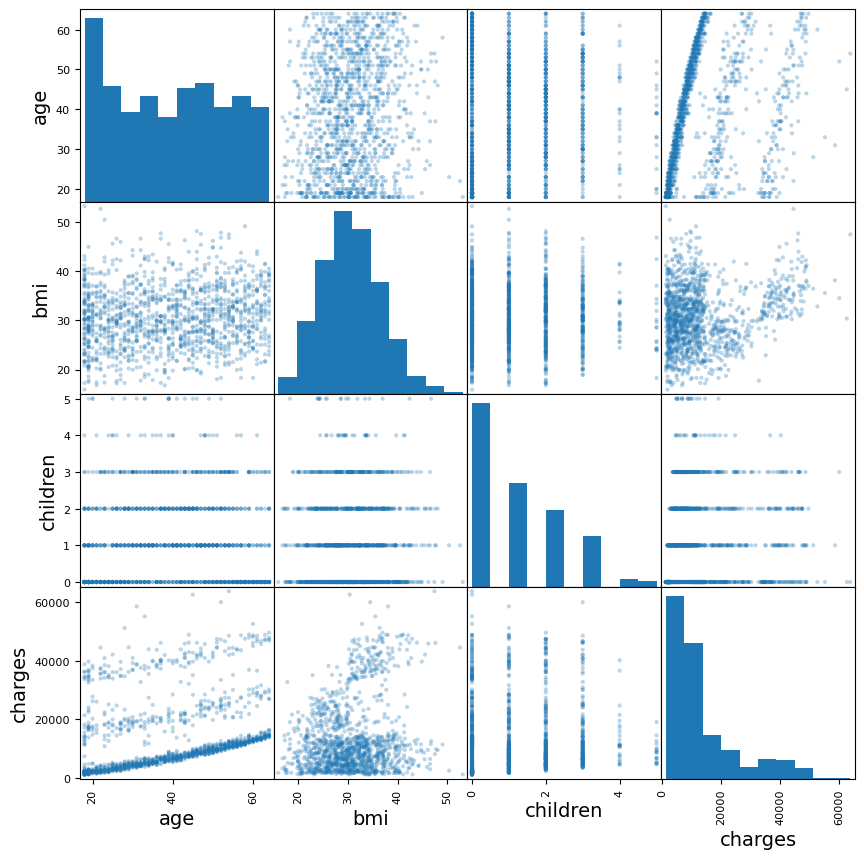

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.3, figsize=(10, 10), diagonal='hist')

## 10. Patterns in the Scatterplot Matrix

1. `age` vs `charges`: This shows a clear *positive correlation*. As age increases, medical charges generally increase. Three distinct parallel "bands" or lines of data points moving upward can be seen as well. This suggests there might be a categorical variable separating the population into three groups.
2. `bmi` vs `charges`: There is a general trend that higher BMI leads to higher charges. The population is also divided in two cluster. The top right cluster likely indicates that obesity significantly impacts costs.
3. No correlation between the independent Variables `age` and `bmi`.

## 11. Seaborn's Pairplot

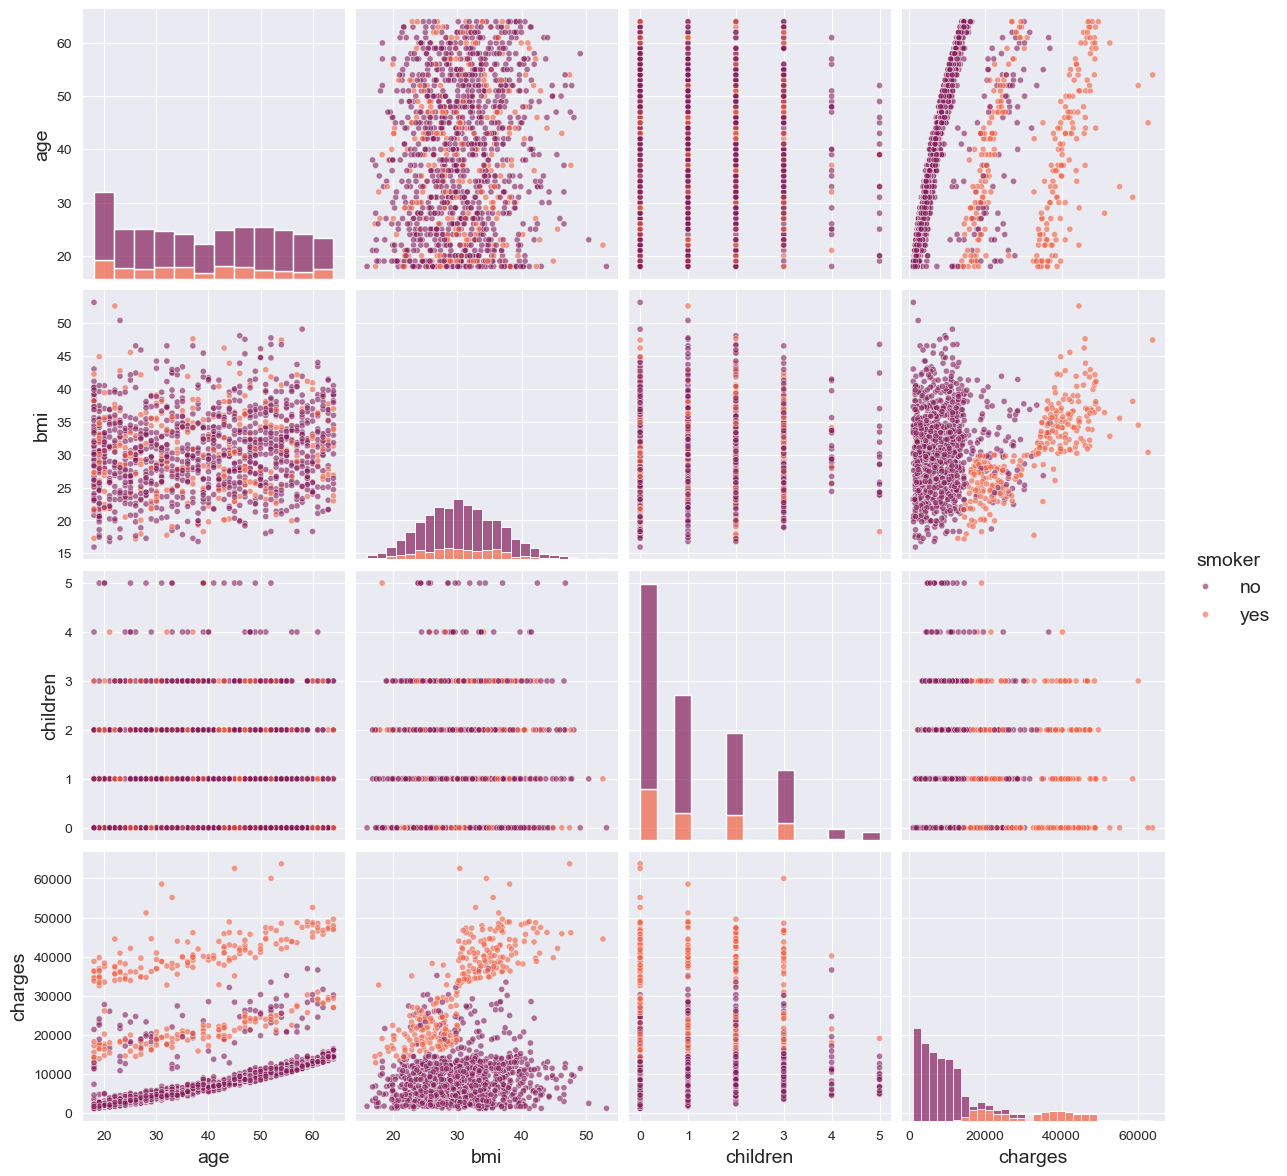

In [16]:
sns.set_style("darkgrid")

pair_plot = sns.pairplot(
    df, 
    hue='smoker',
    palette='rocket',
    height=3,
    diag_kind='hist',
    plot_kws={
        'alpha': 0.6,
        's': 20,
        'edgecolor': 'white',
        'linewidth': 0.5
    },
        diag_kws={
        'alpha': 0.7,
        'multiple': 'stack'
    }
)

plt.show()

Adding the hue='smoker' parameter while using seaborn's pairplot reveals new patterns that were impossible to distinguish in the solid blue plots. The most significant new insights are:
* `bmi` vs `charges`: The purple points form a flat, horizontal cluster. This implies that for non-smokers, increasing BMI has very little effect on medical charges. The orange points shows a upward trend. This means that obesity (high BMI) drastically multiplies costs only if the person is also a smoker.
* `age` vs `charge`: In the previous plot, we saw three parallel lines. The colors now explain them:
  * Bottom Band (Purple): These are **healthy non-smokers**. Costs increase due to aging.
  * Middle Band (Orange): These are **smokers with low BMI** (as evident from the `age` vs `charge` scatter plot). Smoking adds a fixed amount to their cost, but they are still cheaper than obese smokers.
  * Top Band (Orange): These are **smokers with high BMI**. This is the group with the maximum charges.

# Dummy Encoding

In [17]:
data = pd.get_dummies(df, dtype=int, drop_first=True) # drop_first to avoid multicolinearity
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


## 12. Fit the Linear Regression Model

In [18]:
import statsmodels.api as sm

y = data['charges']
X = data.drop(columns=['charges'])

# Add the constant term (Intercept) to the predictor variables
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

## 13. Beta Coefficients & its Count

In [19]:
print(model.params)

const              -11938.538576
age                   256.856353
bmi                   339.193454
children              475.500545
sex_male             -131.314359
smoker_yes          23848.534542
region_northwest     -352.963899
region_southeast    -1035.022049
region_southwest     -960.050991
dtype: float64


The coefficients (betas) tell us how much the charges change for a one-unit change in that specific feature, assuming all other features stay the same.
- Original features: `age`, `bmi`, `children`, `sex`, `smoker`, `region` (6 total).
- The count increases to 8 (not 11 because **we dropped the first column to avoid multicolinearity**) because of the Dummy Enoding process (One-Hot Encoding) applied in the previous step:
    - Numerical Features (3): `age`, `bmi`, `children`
    - Sex (1): `sex_male`
    - Smoker (1): `smoker_yes`
    - Region (3): `region_northwest`, `region_southeast`, `region_southwest`

## 14. Effect of Numerical Features

1. Age : For every additional year of age, medical expenses increase by approximately \$256.86.
2. BMI: For every 1 unit increase in BMI, medical expenses increase by approximately \$339.19.
3. Child: For each additional child, medical expenses increase by approximately \$475.50.

## 15. Effect of Categorical Feature

To interpret these, we compare the visible coefficient to the "Reference Group" (the one that was dropped/missing from the list).
1. Smoker: This is the most significant factor. Being a smoker increases the expected medical cost by a massive \$23,848.53 compared to a non-smoker.
2. Sex: Being male is associated with paying $131.31 less than being female, holding all else constant.
3. Region: All the visible region coefficients are negative (-352, -1035, -960). This means that living in the Northeast is the most expensive.

## 16. Evaluate Model Performance

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 28 Jan 2026   Prob (F-statistic):               0.00
Time:                        04:02:04   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

## 17. Model Performance Metrics

### 17.a. Adjusted R-squared: 0.751
This value indicates that the model explains approximately 75.1% of the variation in medical charges. The remaining ~24.9% of the variation is due to random error or factors not included in the model. 

### 17.b. Prob (F-statistic): 0.00
This is the p-value for the model. It tests whether the model as a whole is statistically significant (if it is better than random guesses).
So, the model is statistically significant. Since the value is 0.00 (< 0.05), we can be  confident that the relationship between the features and the medical charges is real and not just due to random chance.

# Scikit-learn

## 18. Dataset Splitting

In [21]:
from sklearn.model_selection import train_test_split

# Drop the 'const' column that carried over from statsmodels
X = X.drop(columns=['const'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (1070, 8)
Testing shape: (268, 8)


## 19. Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression(fit_intercept=True)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

### Comparison between Statsmodel and Scikit-Learn's Linear Regression Coefficients

In [23]:
sm_params = model.params
sklearn_data = {'const': lr_model.intercept_}
for name, coef in zip(X_train.columns, lr_model.coef_):
    sklearn_data[name] = coef
sklearn_params = pd.Series(sklearn_data)
comparison_df = pd.DataFrame({
    'Statsmodels (Full Data)': sm_params,
    'Scikit-Learn (Train Data)': sklearn_params
})
print(comparison_df.round(4))

                  Statsmodels (Full Data)  Scikit-Learn (Train Data)
const                         -11938.5386                -11931.2191
age                              256.8564                   256.9757
bmi                              339.1935                   337.0926
children                         475.5005                   425.2788
sex_male                        -131.3144                   -18.5917
smoker_yes                     23848.5345                 23651.1289
region_northwest                -352.9639                  -370.6773
region_southeast               -1035.0220                  -657.8643
region_southwest                -960.0510                  -809.7994


## 20. SGDRegressor

In [24]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# Scale the data, SGDRegressor does not perform well on unscaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

sgd_model = SGDRegressor(
    loss='squared_error',
    learning_rate='adaptive',
    eta0=0.01,
    max_iter=1000,
    penalty='l2',
    alpha=0.0001,
    random_state=42,
    tol=1e-5
)

sgd_model.fit(X_train_scaled, y_train)

y_pred_sgd = sgd_model.predict(X_test_scaled)
print(f"SGD Model Trained. Iterations: {sgd_model.n_iter_}")

SGD Model Trained. Iterations: 130


## 21. Mini-batch Gradient Descent

In [25]:
mini_batch_sgd = SGDRegressor(
    learning_rate='constant',
    eta0=0.01,
    penalty='l1',
    alpha=0.01,
    random_state=42
)

batch_size = 50 
n_samples = X_train_scaled.shape[0]
epoch = 1000
for epoch in range(epoch):
    shuffler = np.random.permutation(n_samples)
    X_train_shuffled = X_train_scaled[shuffler]
    y_train_shuffled = y_train.iloc[shuffler]
    
    for i in range(0, n_samples, batch_size):
        X_batch = X_train_scaled[i:i+batch_size]
        y_batch = y_train.iloc[i:i+batch_size]
        
        # partial_fit updates the model with just this batch
        mini_batch_sgd.partial_fit(X_batch, y_batch)

y_pred_mini = mini_batch_sgd.predict(X_test_scaled)

## 22. Key Hyperparameters

For, the SGDRegressor and the Mini-batch Gradient Descent:
- `learning_rate`: Controls how big of a step the algorithm takes towards the minimum. Common options are 'constant', 'optimal', 'invscaling', or 'adaptive'.
- `eta0`: The initial learning rate value.
- `max_iter`: The maximum number of passes over the training data. `epoch` for the mini-batch.
- `penalty`: The regularization term to use ('l2' for Ridge, 'l1' for Lasso).
- `alpha`: The strength of the regularization (penalty).

## 23. Evaluation Metrics

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

def evaluate_model(y_true, y_pred, X_data, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100

    # adjusted r2
    n = len(y_true)              # Number of observations
    p = X_data.shape[1]          # Number of features (predictors)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    print(f"--- {model_name} Performance ---")
    print(f"MAE:          {mae:.2f}")
    print(f"RMSE:         {rmse:.2f}")
    print(f"MAPE:         {mape:.2f}%") 
    print(f"R2 Score:     {r2:.4f}")
    print(f"Adjusted R2:  {adj_r2:.4f}")

In [27]:
# Evaluate Normal Linear Regression
evaluate_model(y_test, y_pred_lr, X_test, "Linear Regression (OLS)")

--- Linear Regression (OLS) Performance ---
MAE:          4181.19
RMSE:         5796.28
MAPE:         46.89%
R2 Score:     0.7836
Adjusted R2:  0.7769


In [28]:
# Evaluate SGD Regressor
evaluate_model(y_test, y_pred_sgd, X_test_scaled, "SGD Regressor")

--- SGD Regressor Performance ---
MAE:          4180.10
RMSE:         5796.00
MAPE:         46.86%
R2 Score:     0.7836
Adjusted R2:  0.7769


In [29]:
# Evaluate SGD Regressor
evaluate_model(y_test, y_pred_mini, X_test_scaled, "Mini-batch Gradient Descent")

--- Mini-batch Gradient Descent Performance ---
MAE:          4141.43
RMSE:         5778.78
MAPE:         47.68%
R2 Score:     0.7849
Adjusted R2:  0.7783


# Findings

1. This excersise included an exploration of medical insurance charges data. I found that the `charges` variable is strongly right-skewed, indicating a need for potential transformation in more advanced models.
2. Categorical features like `smoker` show significant imbalance, while `sex` and `region` are balanced.
3. Correlation analysis and scatter plots revealed a moderate positive correlation between `age`, `bmi`, `children` vs `charges`.
4. For dummy encoding `drop_first=True` should be set to avoid multicolinearity between the encoded categorical features.
5. The `smoker` variable emerged as the most significant predictor, drastically increasing charges.
6. Linear Regression models, including OLS, SGDRegressor, and Mini-batch Gradient Descent, achieved a good Adjusted $R^2$ of approximately 0.77-0.78, indicating they explain a substantial portion of the variance in medical charges.
7. SGDRegressor and Mini-batch Gradient Descent includes multiple hyperparameters which could be optimized for improved performance.
8. Shuffling data before creating mini-batches is required to break possible temporal correlations or ordering bias in the training set.